# **Time Series Analysis Of Ali BABA Stock Price.**

In [10]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
%matplotlib inline 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots  import plot_acf,plot_pacf




In [3]:
# Loading Dataset
df  = pd.read_csv('BABA.csv') 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,216.600006,219.979996,216.539993,219.770004,216.854889,15873500
1,2020-01-03,216.350006,218.203003,216.009995,217.000000,214.121628,8604500
2,2020-01-06,214.889999,217.160004,214.089996,216.639999,213.766403,11885500
3,2020-01-07,217.639999,218.940002,216.690002,217.630005,214.743286,9388000
4,2020-01-08,216.600006,220.649994,216.320007,218.000000,215.108368,11959100
...,...,...,...,...,...,...,...
1084,2024-04-24,73.739998,74.699997,73.500000,74.629997,74.629997,16375200
1085,2024-04-25,73.805000,75.199997,73.805000,75.110001,75.110001,11921900
1086,2024-04-26,76.184998,76.930000,75.059998,75.550003,75.550003,14216100
1087,2024-04-29,75.650002,76.529999,75.220001,76.410004,76.410004,13076400


In [4]:
# Checking for Null values in dataset
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1089 non-null   object 
 1   Open       1089 non-null   float64
 2   High       1089 non-null   float64
 3   Low        1089 non-null   float64
 4   Close      1089 non-null   float64
 5   Adj Close  1089 non-null   float64
 6   Volume     1089 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 59.7+ KB


In [6]:
# Checking if the data is Stationary or not.
from statsmodels.tsa.stattools import adfuller
def check_stationary(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-vslue: %f'% result[1])
    if result[1] <=0.5:
        print('reject the null hypothesis. Data is stationary')
    else:
        print('Fail to reject the null hypothesis. Data is not stationary')
check_stationary(df['Adj Close'])

ADF Statistic: -0.912328
p-vslue: 0.783886
Fail to reject the null hypothesis. Data is not stationary


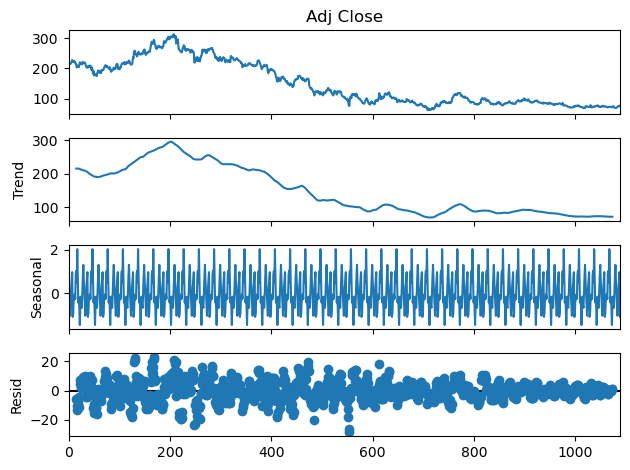

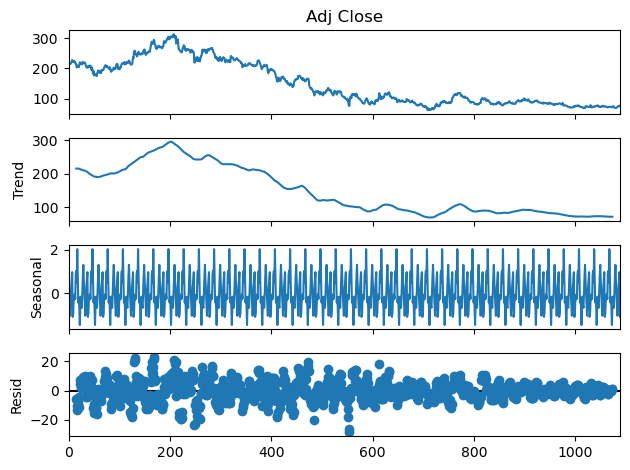

In [9]:

# Data is not atationary so performing the Saesonal method.
decompose = seasonal_decompose(df['Adj Close'], model='additive', period=30)
decompose.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

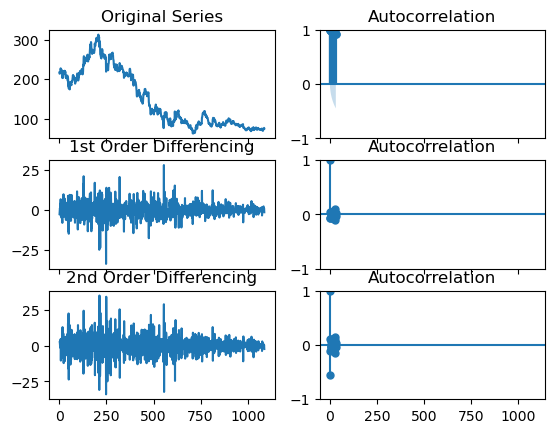

In [12]:
# Selecting the order difference for value for varaibles.
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Adj Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Adj Close'], ax=axes[0, 1])

  # 1st Order Differencing
axes[1, 0].plot(df['Adj Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Adj Close'].diff().dropna(), ax=axes[1, 1])

  # 2nd Order Differencing
axes[2, 0].plot(df['Adj Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Adj Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show

           0
0   1.000000
1   0.997031
2   0.994406
3   0.991549
4   0.988956
5   0.986134
6   0.983391
7   0.980817
8   0.978027
9   0.975322
10  0.972670
11  0.970073
12  0.967395
13  0.965027
14  0.962724
15  0.960327
16  0.958084
17  0.956113
18  0.954115
19  0.951853
20  0.949436
21  0.947138
22  0.944893
23  0.942823
24  0.940712
25  0.938719
26  0.936382
27  0.934461
28  0.932392
29  0.930297
30  0.928393


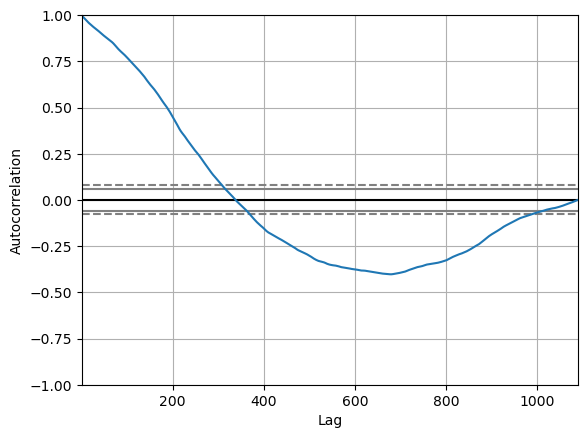

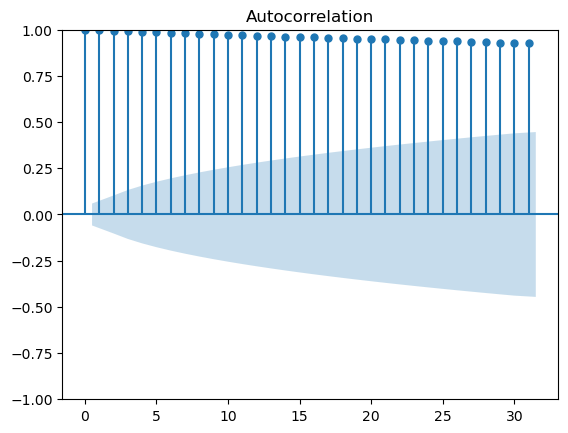

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Adj Close'])
plot_acf(df['Adj Close'], alpha=0.05)
from statsmodels.tsa.stattools import acf,pacf
x_acf = pd.DataFrame(acf(df['Adj Close']))
print(x_acf)

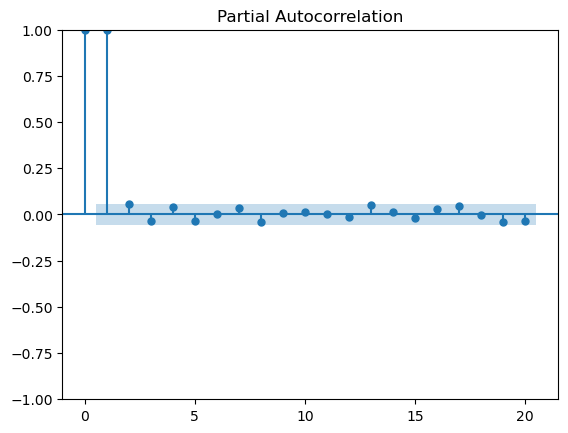

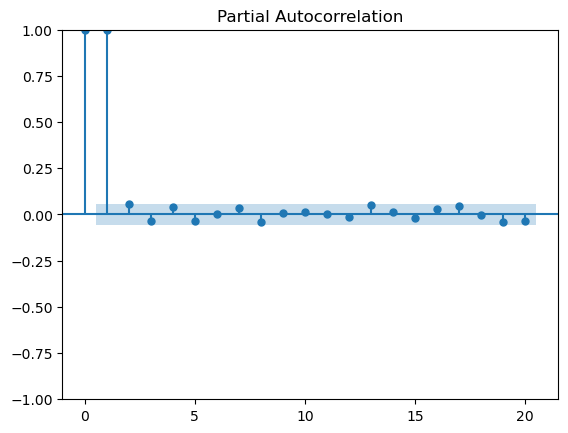

In [23]:
from statsmodels.tsa.stattools import acf,pacf
plot_pacf(df['Adj Close'], lags=20,alpha=0.05)

**D = 1
 P = 3 
 q = 2**

In [40]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm 
import warnings
p , d, q = 1 ,3,2
model = sm.tsa.statespace.SARIMAX(df['Adj Close'], 
                                  order=(p,d,q),
                                  seasonal_order=(p,d,q,3))
model = model.fit()
print(model.summary())

c:\Users\saboor\miniconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



                                     SARIMAX Results                                     
Dep. Variable:                         Adj Close   No. Observations:                 1089
Model:             SARIMAX(1, 3, 2)x(1, 3, 2, 3)   Log Likelihood               -3677.272
Date:                           Thu, 09 May 2024   AIC                           7368.544
Time:                                   01:39:57   BIC                           7403.417
Sample:                                        0   HQIC                          7381.750
                                          - 1089                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0510      0.025     -2.012      0.044      -0.101      -0.001
ma.L1         -1.9979      0.237     -8.434

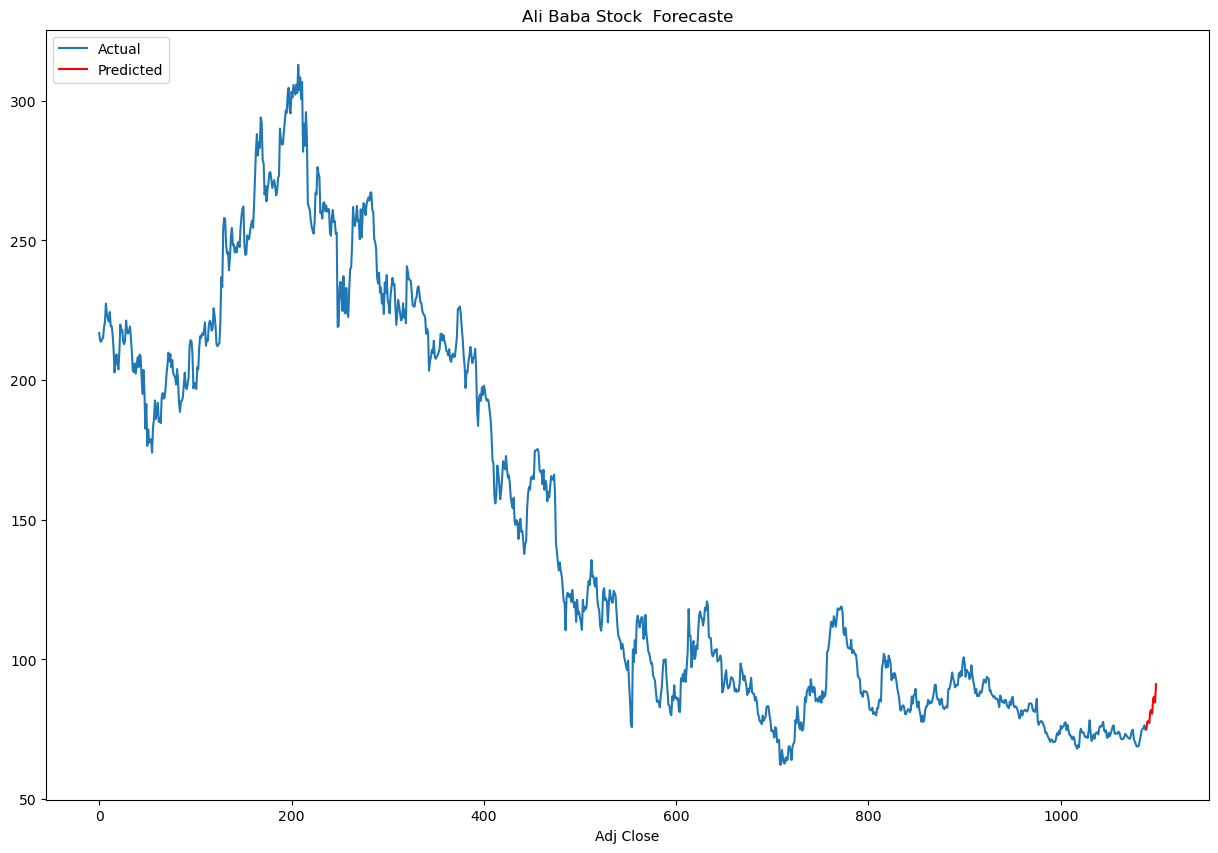

In [42]:
predictions = model.predict(start=len(df['Adj Close']),end=len(df['Adj Close'])+10)
# Plot the prediction 
plt.figure(figsize=(15,10))
plt.plot(df['Adj Close'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Adj Close')
plt.title('Ali Baba Stock  Forecaste')
# Change legend location 
plt.legend(loc='upper left')
plt.show()

In [28]:
import plotly.graph_objects as go
from prophet import Prophet  
d_new = df[['Date','Adj Close']]
d_new.columns = ['ds', 'y']

m = Prophet()
m.fit(d_new)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig = go.Figure()

fig.add_trace(go.Scatter( x = forecast['ds'], y = forecast['yhat'],
                        mode='lines+markers',name='Predicted Cases',marker_color='DarkSlateGray'))
fig.add_trace(go.Scatter( x = d_new['ds'], y = d_new['y'],
                        mode='lines+markers',name='Actual Cases',marker_color='Tomato'))

01:30:51 - cmdstanpy - INFO - Chain [1] start processing
01:30:52 - cmdstanpy - INFO - Chain [1] done processing


In [43]:
import plotly.graph_objects as go
from prophet import Prophet  
d_new = df[['Date','Volume']]
d_new.columns = ['ds', 'y']

m = Prophet()
m.fit(d_new)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig = go.Figure()

fig.add_trace(go.Scatter( x = forecast['ds'], y = forecast['yhat'],
                        mode='lines+markers',name='Predicted Cases',marker_color='DarkSlateGray'))
fig.add_trace(go.Scatter( x = d_new['ds'], y = d_new['y'],
                        mode='lines+markers',name='Actual Cases',marker_color='Tomato'))

01:42:05 - cmdstanpy - INFO - Chain [1] start processing
01:42:05 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
import plotly.graph_objects as go
from prophet import Prophet  
d_new = df[['Date','High']]
d_new.columns = ['ds', 'y']

m = Prophet()
m.fit(d_new)

future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

fig = go.Figure()

fig.add_trace(go.Scatter( x = forecast['ds'], y = forecast['yhat'],
                        mode='lines+markers',name='Predicted Cases',marker_color='DarkSlateGray'))
fig.add_trace(go.Scatter( x = d_new['ds'], y = d_new['y'],
                        mode='lines+markers',name='Actual Cases',marker_color='Tomato'))

01:42:41 - cmdstanpy - INFO - Chain [1] start processing
01:42:42 - cmdstanpy - INFO - Chain [1] done processing
